<a href="https://colab.research.google.com/github/shailshree23/ML_Lab/blob/main/Linear%2C_Ridge_and_Lasso_simplercode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
def linear_regression(x, y):
  n = len(x)
  # calculate means
  x_bar = sum(x) / n
  y_bar = sum(y) / n
  # calculate numerator and denominator
  num = 0 # Sxy
  den = 0 # Sxx
  for i in range(n):
    num += (x[i] - x_bar) * (y[i] - y_bar)
    den += (x[i] - x_bar) ** 2

  m = num / den
  c = y_bar - m * x_bar
  return c, m




In [6]:
def ridge_regression(x, y, lam):
  n = len(x)
  x_bar = sum(x) / n
  y_bar = sum(y) / n


  num = 0
  den = 0
  for i in range(n):
    num += (x[i] - x_bar) * (y[i] - y_bar)
    den += (x[i] - x_bar) ** 2


  m = num / (den + lam)
  c = y_bar - m * x_bar
  return c, m

In [7]:
def lasso_regression(x, y, lam):
   n = len(x)
   x_bar = sum(x) / n
   y_bar = sum(y) / n
   num = 0
   den = 0
   for i in range(n):
      num += (x[i] - x_bar) * (y[i] - y_bar)
      den += (x[i] - x_bar) ** 2


# soft thresholding
   if abs(num) <= lam:
     m = 0
   else:
     m = (abs(num) - lam) / den
   if num < 0:
     m = -m


   c = y_bar - m * x_bar
   return c, m


In [8]:
def predict(c, m, x):
  return [c + m * xi for xi in x]


def mse(actual, predicted):
  n = len(actual)
  s = 0
  for i in range(n):
     s += (actual[i] - predicted[i]) ** 2
  return s / n

In [9]:
# Dataset 1
x = [2, 4, 6, 8, 10]
y = [5, 8, 9, 13, 16]


# Linear Regression
c_lin, m_lin = linear_regression(x, y)
p_lin = predict(c_lin, m_lin, x)
print("Linear Regression:")
print("c =", c_lin, "m =", m_lin)
print("Predicted =", p_lin)
print("MSE =", mse(y, p_lin))


# Ridge Regression
c_rid, m_rid = ridge_regression(x, y, 1)
p_rid = predict(c_rid, m_rid, x)
print("\nRidge Regression:")
print("c =", c_rid, "m =", m_rid)
print("Predicted =", p_rid)
print("MSE =", mse(y, p_rid))


# Lasso Regression
c_las, m_las = lasso_regression(x, y, 1)
p_las = predict(c_las, m_las, x)
print("\nLasso Regression:")
print("c =", c_las, "m =", m_las)
print("Predicted =", p_las)
print("MSE =", mse(y, p_las))

Linear Regression:
c = 2.099999999999998 m = 1.35
Predicted = [4.799999999999998, 7.499999999999998, 10.2, 12.899999999999999, 15.599999999999998]
MSE = 0.38000000000000056

Ridge Regression:
c = 2.2975609756097555 m = 1.3170731707317074
Predicted = [4.931707317073171, 7.565853658536585, 10.2, 12.834146341463414, 15.46829268292683]
MSE = 0.38867340868530603

Lasso Regression:
c = 2.25 m = 1.325
Predicted = [4.9, 7.55, 10.2, 12.85, 15.5]
MSE = 0.38499999999999973


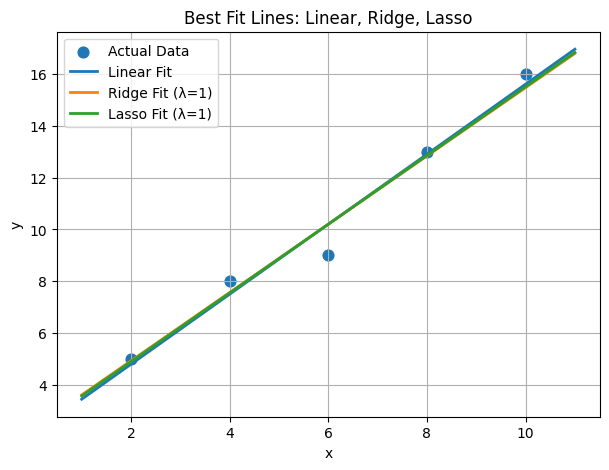

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy for plotting
x_arr = np.array(x)

# Generate smooth line for plotting
x_line = np.linspace(min(x) - 1, max(x) + 1, 200)

y_lin_line = c_lin + m_lin * x_line
y_rid_line = c_rid + m_rid * x_line
y_las_line = c_las + m_las * x_line

plt.figure(figsize=(7,5))

# Scatter plot of actual points
plt.scatter(x, y, label="Actual Data", s=60)

# Best-fit lines
plt.plot(x_line, y_lin_line, label="Linear Fit", linewidth=2)
plt.plot(x_line, y_rid_line, label=f"Ridge Fit (λ=1)", linewidth=2)
plt.plot(x_line, y_las_line, label=f"Lasso Fit (λ=1)", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Best Fit Lines: Linear, Ridge, Lasso")
plt.grid(True)
plt.legend()
plt.show()


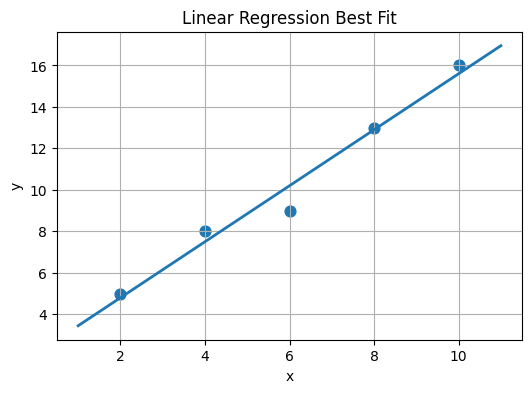

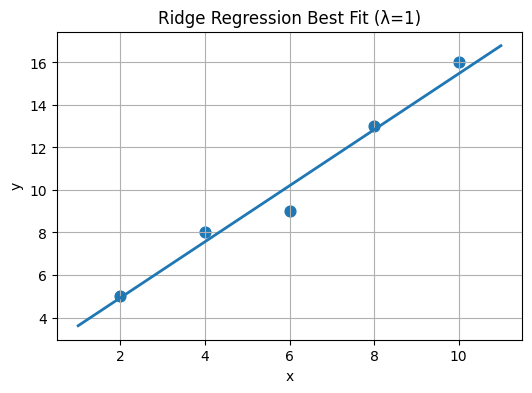

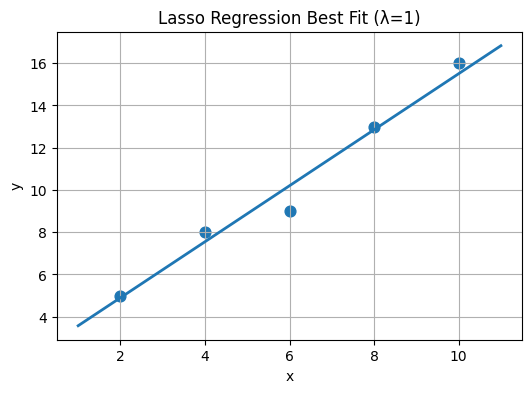

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.array(x)
x_line = np.linspace(min(x) - 1, max(x) + 1, 200)

# ---------- Linear ----------
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=60)
plt.plot(x_line, c_lin + m_lin * x_line, linewidth=2)
plt.title("Linear Regression Best Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# ---------- Ridge ----------
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=60)
plt.plot(x_line, c_rid + m_rid * x_line, linewidth=2)
plt.title("Ridge Regression Best Fit (λ=1)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# ---------- Lasso ----------
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=60)
plt.plot(x_line, c_las + m_las * x_line, linewidth=2)
plt.title("Lasso Regression Best Fit (λ=1)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
